## Division of Teaching and Learning (DT&L) Employee Job Satisfaction and Engagement

Using employee exit survey data to improve employee engagement, satisfaction, and retention within the Division of Teaching and Learning.

### I. Data Collection and Wrangling

Analysis perfomred with Python

1) Import Excel Files as a Pandas DataFrame

In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

# Import 'DTL Exit Survey Data' excel file as a Pandas DataFrame
df_1 = pd.read_excel('DTL Exit Survey Data.xls', sheetname='Exit_Survey_Results')

df_1.head()

,ID,Office,Team,Type of Interview,Remain Confidential?,Time With DT&L,Time With DOE,Reason for Leaving,2nd Reason For Leaving,Where will you be working next?,...,How supportive was your immediate supervisor in your work?,To what extent was the value of collaboration present in your work?,To what extent was the value of equity present in your work?,To what extent was the value of coherence present in your work ?,To what extent was the value of continuous improvement present in your work?,How often did you receive feedback from your supervisor?,Frequency of Feedback (Check all that apply),Reason for leaving Notes,Survey Completed On,Notes
0,1352795.0,OTD,NaN,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking higher salary,Seeking career advancement,External - Related to education,...,Extremely supportive,Extremely present,Moderately present,Extremely present,Very present,Almost always,NaN,NaN,2018-05-02 12:20:17,NaN
1,1154343.0,OPE,NaN,Neither,Yes - Report in the aggregate,4+ Years,7 - 10 Years,Retirement,None of the above,None of the above,...,Extremely supportive,Very present,Very present,Very present,Moderately present,Almost always,NaN,NaN,2018-07-17 11:08:39,NaN
2,1284286.0,OPE,Assessment,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking a better work life balance,Family and personal reasons,I don't know,...,Extremely supportive,Very present,Moderately present,Moderately present,Very present,Almost always,NaN,NaN,2018-05-17 12:49:10,NaN
3,529597.0,OPE,Research & Policy Support Group,In Person,Yes - Report in the aggregate,3 - 4 Years,3 - 4 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,External - Not related to education,...,Not at all supportive,Slightly present,Slightly present,Moderately present,Not at all present,Almost never,NaN,NaN,2018-04-20 14:11:22,NaN
4,NaN,OPE,Academic Policy & Systems,Phone,Yes - Report in the aggregate,1 - 2 Years,1 - 2 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,Another position within DTL,...,Not at all supportive,Not at all present,Moderately present,Slightly present,Not at all present,Almost never,NaN,NaN,2018-07-23 14:58:25,NaN


2) Rename columns to make it cleaner and for the ID column name to match.

In [2]:
#df_1.info()

df_1.rename(columns={'Type of Interview':'Interview_Type', 'Remain Confidential?':'Confidential', 'Time With DT&L' : 'Years_with_DTL', 'Time With DOE': 'Years_with_DOE','Reason for Leaving': 'Exit_Reason_1', '2nd Reason For Leaving': 'Exit_Reason_2','Where will you be working next?':'Work_Plans', 'How interested are you in returning to DT&L in the future':'Return_Interest_DTL', 'How interested are you in returning to NYC DOE in the future':'Return_Interest_DOE', 'What recommendations would you give to senior leaders to improve the workplace?':'Recommendations', 'How satisfied were you with the feedback you received from your supervisor? ': 'Feedback_Satisfaction','How supportive was the Executive Director of your team in your work? ' :'Exec_Direc_Support','How satisfied were you in your role on a daily basis':'Job_Satisfaction', 'How supportive was your immediate supervisor in your work? ': 'Supervisor_Support', 'To what extent was the value of collaboration present in your work?': 'Collaboration', 'To what extent was the value of equity present in your work?':'Equity', 'To what extent was the value of coherence present in your work ?':'Coherence', 'To what extent was the value of continuous improvement present in your work?':'Cont_Improvement','How often did you receive feedback from your supervisor?':'Feedback', 'Survey Completed On':'Survey_Date'}, inplace=True)

In [3]:
df_1.columns

Index(['ID', 'Office', 'Team', 'Interview_Type', 'Confidential',
       'Years_with_DTL', 'Years_with_DOE', 'Exit_Reason_1', 'Exit_Reason_2',
       'Work_Plans', 'Return_Interest_DTL', 'Return_Interest_DOE',
       'Recommendations', 'Feedback_Satisfaction', 'Exec_Direc_Support',
       'Job_Satisfaction', 'Supervisor_Support', 'Collaboration', 'Equity',
       'Coherence', 'Cont_Improvement', 'Feedback',
       'Frequency of Feedback (Check all that apply)',
       'Reason for leaving Notes', 'Survey_Date', 'Notes'],
      dtype='object')

In [4]:
# Import 'NYCAPS All Employees' excel file as a Pandas DataFrame
df_2 = pd.read_excel('NYCAPS All Employees .xls', sheetname='All_Employees')

df_2.head()

,Employee ID,Employment Status,Employee Status,Team,Civil Service Title*
0,NaN,Inactive,Consultant,"Budget, Operations, & Strategic Projects (BOS)",NaN
1,1082026.0,Inactive,Full Time,Periodic Assessment,EDUC OFFICER (UFT) (H-BANK)
2,1300733.0,Inactive,Full Time,Arts,ADMIN STAFF ANALYST - (Annual)
3,1607154.0,Inactive,Full Time,Student Programs & External Partnerships,ADMIN EDUCATION OFFICER - (Annual) Union
4,845695.0,Inactive,Full Time,Periodic Assessment,ADMIN EDUCATION OFFICER - (Annual) Union


In [5]:
# Rename columns to be consistent
df_2.rename(columns={'Employee ID':'ID','Employment Status':'Employment_Status','Employee Status':'Employee_Status', 'Civil Service Title*':'Title'}, inplace=True)

3) Merge the two excel files into one dataframe 

In [6]:
df = pd.merge(df_1, df_2, on='ID', how='left')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 30 columns):
ID                                              30 non-null float64
Office                                          34 non-null object
Team_x                                          27 non-null object
Interview_Type                                  32 non-null object
Confidential                                    34 non-null object
Years_with_DTL                                  34 non-null object
Years_with_DOE                                  34 non-null object
Exit_Reason_1                                   34 non-null object
Exit_Reason_2                                   31 non-null object
Work_Plans                                      34 non-null object
Return_Interest_DTL                             34 non-null object
Return_Interest_DOE                             34 non-null object
Recommendations                                 24 non-null object
Feedback_Satisfaction    

In [8]:
# Drop duplicate columns (Team_x and Team_y)

# define our drop function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df

# func to rename '_x' cols
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)

display(df.head())

,ID,Office,Team,Interview_Type,Confidential,Years_with_DTL,Years_with_DOE,Exit_Reason_1,Exit_Reason_2,Work_Plans,...,Coherence,Cont_Improvement,Feedback,Frequency of Feedback (Check all that apply),Reason for leaving Notes,Survey_Date,Notes,Employment_Status,Employee_Status,Title
0,1352795.0,OTD,NaN,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking higher salary,Seeking career advancement,External - Related to education,...,Extremely present,Very present,Almost always,NaN,NaN,2018-05-02 12:20:17,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
1,1154343.0,OPE,NaN,Neither,Yes - Report in the aggregate,4+ Years,7 - 10 Years,Retirement,None of the above,None of the above,...,Very present,Moderately present,Almost always,NaN,NaN,2018-07-17 11:08:39,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
2,1284286.0,OPE,Assessment,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking a better work life balance,Family and personal reasons,I don't know,...,Moderately present,Very present,Almost always,NaN,NaN,2018-05-17 12:49:10,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
3,529597.0,OPE,Research & Policy Support Group,In Person,Yes - Report in the aggregate,3 - 4 Years,3 - 4 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,External - Not related to education,...,Moderately present,Not at all present,Almost never,NaN,NaN,2018-04-20 14:11:22,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
4,NaN,OPE,Academic Policy & Systems,Phone,Yes - Report in the aggregate,1 - 2 Years,1 - 2 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,Another position within DTL,...,Slightly present,Not at all present,Almost never,NaN,NaN,2018-07-23 14:58:25,NaN,Inactive,Consultant,NaN


Since there are only a few and some with no entries in the columns 'frequency of feedback', 'Reason for leaving notes', & 'Notes' we can drop them.

In [9]:
df.drop(['Frequency of Feedback (Check all that apply)', 'Reason for leaving Notes', 'Notes'], axis=1)

,ID,Office,Team,Interview_Type,Confidential,Years_with_DTL,Years_with_DOE,Exit_Reason_1,Exit_Reason_2,Work_Plans,...,Supervisor_Support,Collaboration,Equity,Coherence,Cont_Improvement,Feedback,Survey_Date,Employment_Status,Employee_Status,Title
0,1352795.0,OTD,NaN,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking higher salary,Seeking career advancement,External - Related to education,...,Extremely supportive,Extremely present,Moderately present,Extremely present,Very present,Almost always,2018-05-02 12:20:17,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
1,1154343.0,OPE,NaN,Neither,Yes - Report in the aggregate,4+ Years,7 - 10 Years,Retirement,None of the above,None of the above,...,Extremely supportive,Very present,Very present,Very present,Moderately present,Almost always,2018-07-17 11:08:39,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
2,1284286.0,OPE,Assessment,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking a better work life balance,Family and personal reasons,I don't know,...,Extremely supportive,Very present,Moderately present,Moderately present,Very present,Almost always,2018-05-17 12:49:10,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
3,529597.0,OPE,Research & Policy Support Group,In Person,Yes - Report in the aggregate,3 - 4 Years,3 - 4 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,External - Not related to education,...,Not at all supportive,Slightly present,Slightly present,Moderately present,Not at all present,Almost never,2018-04-20 14:11:22,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
4,NaN,OPE,Academic Policy & Systems,Phone,Yes - Report in the aggregate,1 - 2 Years,1 - 2 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,Another position within DTL,...,Not at all supportive,Not at all present,Moderately present,Slightly present,Not at all present,Almost never,2018-07-23 14:58:25,Inactive,Consultant,NaN
5,NaN,OPE,Academic Policy & Systems,Phone,Yes - Report in the aggregate,1 - 2 Years,1 - 2 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,Another position within DTL,...,Not at all supportive,Not at all present,Moderately present,Slightly present,Not at all present,Almost never,2018-07-23 14:58:25,Inactive,Consultant,NaN
6,1626439.0,OPE,NaN,In Person,No - You may attribute my name to my responses,6 Months - 1 Year,6 Months - 1 Year,Relocation,Seeking career advancement,External - Related to education,...,Moderately supportive,Slightly present,Moderately present,Slightly present,Moderately present,Almost never,2018-05-18 09:21:22,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
7,1433786.0,OPE,Assessment,In Person,Yes - Report in the aggregate,4+ Years,3 - 4 Years,Seeking a more respectful work environment,Seeking a more supportive supervisor,Consultant through School Professionals,...,Not at all supportive,Slightly present,Moderately present,Slightly present,Moderately present,Almost never,2018-06-25 11:34:37,Inactive,Full Time,EDUC OFFICER (UFT) (H-BANK)
8,946669.0,OTD,"Learning Strategy, and Systems",In Person,No - You may attribute my name to my responses,4+ Years,10+ Years,Seeking a better work life balance,Seeking career advancement,External - Related to education,...,Extremely supportive,Extremely present,Very present,Extremely present,Extremely present,Often,2018-05-01 15:16:48,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
9,36014.0,OPSR,Career & Technical Education,Neither,No - You may attribute my name to my responses,4+ Years,10+ Years,Retirement,None of the above,Retirement,...,Extremely supportive,Extremely present,Very present,Moderately present,Extremely present,Often,2018-07-02 10:01:41,Inactive,Full Time,TEACHER - ASSIGNED A


In [10]:
# pd.to_datetime(df['Survey_Date'])

Make the entries in the columns consistent. For example, all lowercase.

In [11]:
df['Job_Satisfaction'] = df['Job_Satisfaction'].replace('Very Satisfied','Very satisfied', regex=True)
df['Job_Satisfaction'] = df['Job_Satisfaction'].replace('Moderately Satisfied','Moderately satisfied', regex=True)

In [12]:
df.head()

,ID,Office,Team,Interview_Type,Confidential,Years_with_DTL,Years_with_DOE,Exit_Reason_1,Exit_Reason_2,Work_Plans,...,Coherence,Cont_Improvement,Feedback,Frequency of Feedback (Check all that apply),Reason for leaving Notes,Survey_Date,Notes,Employment_Status,Employee_Status,Title
0,1352795.0,OTD,NaN,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking higher salary,Seeking career advancement,External - Related to education,...,Extremely present,Very present,Almost always,NaN,NaN,2018-05-02 12:20:17,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
1,1154343.0,OPE,NaN,Neither,Yes - Report in the aggregate,4+ Years,7 - 10 Years,Retirement,None of the above,None of the above,...,Very present,Moderately present,Almost always,NaN,NaN,2018-07-17 11:08:39,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
2,1284286.0,OPE,Assessment,In Person,No - You may attribute my name to my responses,4+ Years,5 - 7 Years,Seeking a better work life balance,Family and personal reasons,I don't know,...,Moderately present,Very present,Almost always,NaN,NaN,2018-05-17 12:49:10,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual)
3,529597.0,OPE,Research & Policy Support Group,In Person,Yes - Report in the aggregate,3 - 4 Years,3 - 4 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,External - Not related to education,...,Moderately present,Not at all present,Almost never,NaN,NaN,2018-04-20 14:11:22,NaN,Inactive,Full Time,ADMIN EDUCATION OFFICER - (Annual) Union
4,NaN,OPE,Academic Policy & Systems,Phone,Yes - Report in the aggregate,1 - 2 Years,1 - 2 Years,Seeking a more supportive supervisor,Seeking a more respectful work environment,Another position within DTL,...,Slightly present,Not at all present,Almost never,NaN,NaN,2018-07-23 14:58:25,NaN,Inactive,Consultant,NaN


### II. Exploratory Data Analysis

1) Primary Reason for Leaving 

Exit_Reason_1
Seeking career advancement                                     10
Seeking a better work life balance                              4
Family and personal reasons                                     4
Seeking career change                                           3
Seeking a more supportive supervisor                            3
Seeking a more respectful work environment                      3
Retirement                                                      2
Relocation                                                      2
Seeking higher salary                                           1
Seeking better benefits (e.g., vacation time or healthcare)     1
Pursuing additional education                                   1
dtype: int64


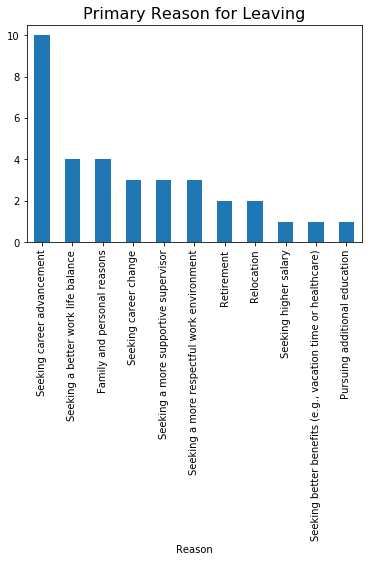

In [13]:
# Primary reason for leaving
import matplotlib.pyplot as plt

# Create dataframe with the a count for each reason for leaving the job
reason_1 = df.groupby(['Exit_Reason_1']).size().sort_values(ascending = False)
print(reason_1)

# Bar Plot 'reason_1' dataframe
reason_1.plot(kind='bar')
plt.xticks(fontsize= 10)
plt.xlabel('Reason')
plt.title("Primary Reason for Leaving", fontsize=16)
plt.show()


2) Secondary Reason for Leaving

Exit_Reason_2
Seeking higer salary                          5
Seeking a more respectful work environment    5
None of the above                             5
Seeking career advancement                    4
Seeking a better work life balance            4
Relocation                                    3
Family and personal reasons                   3
Seeking a more supportive supervisor          2
dtype: int64


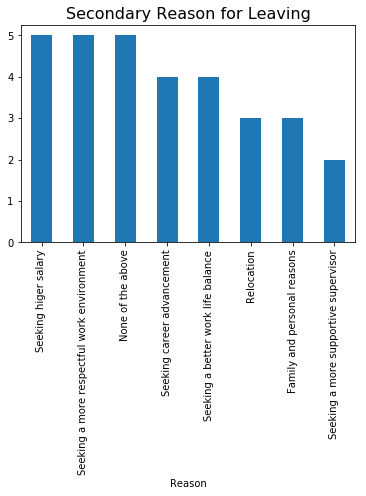

In [14]:
# Secondary reason for leaving

# Create dataframe with the a count for each reason for leaving the job
reason_2 = df.groupby(['Exit_Reason_2']).size().sort_values(ascending = False)
print(reason_2)

# Bar Plot 'reason_2 dataframe
reason_2.plot(kind='bar')
plt.xticks(fontsize= 10)
plt.xlabel('Reason')
plt.title("Secondary Reason for Leaving", fontsize=16)
plt.show()


Analysis: After plotting the primary and secondary reasons for the 31 employees leaving the DOE, the top three reasons are to seek career advancement, higher salary, and more respectful work environment.

### Employee Satisfaction

1) How satisfied were you in your role on a daily basis?

Job_Satisfaction
Very satisfied          14
Moderately satisfied    12
Slightly satisfied       4
Not at all satisfied     3
Extremely Satisfied      1
dtype: int64


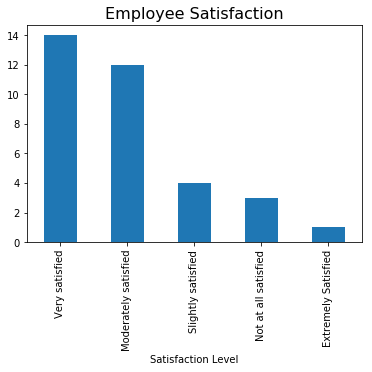

In [115]:
# Create dataframe with the job satisfication 
satisfaction = df.groupby(['Job_Satisfaction']).size().sort_values(ascending = False)
print(satisfaction)

# Bar Plot 'satisfaction' dataframe
satisfaction.plot(kind='bar')
plt.xticks(fontsize= 10)
plt.xlabel('Satisfaction Level')
plt.title("Employee Satisfaction", fontsize=16)
plt.show()


### Employee Support

1) How supportive was the Executive Director of your team in your work?

Exec_Direc_Support
Extremely supportive     16
Moderately supportive     7
Very supportive           5
Slightly supportive       3
Not at all supportive     3
dtype: int64


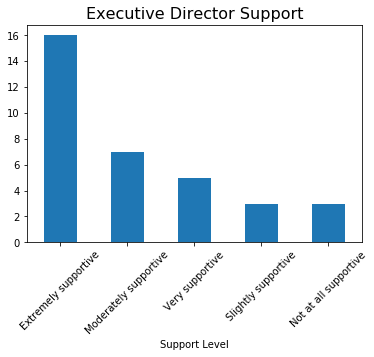

In [116]:
# Create dataframe with the executive director support level
exec_support = df.groupby(['Exec_Direc_Support']).size().sort_values(ascending = False)
print(exec_support)

# Bar Plot 'exec_support dataframe
exec_support.plot(kind='bar')
plt.xticks(fontsize= 10, rotation=45)
plt.xlabel('Support Level')
plt.title("Executive Director Support", fontsize=16)
plt.show()


2) How supportive was your immediate supervisor in your work? 

Supervisor_Support
Extremely supportive     15
Very supportive           8
Moderately supportive     5
Not at all supportive     4
Slightly supportive       2
dtype: int64


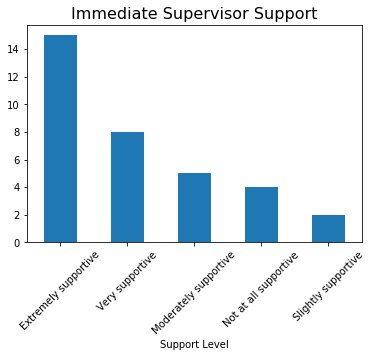

In [117]:
# Create dataframe with the immediate supervisor support level
supervisor_support = df.groupby(['Supervisor_Support']).size().sort_values(ascending = False)
print(supervisor_support)

# Bar Plot 'supervisor_support' dataframe
supervisor_support.plot(kind='bar')
plt.xticks(fontsize= 10, rotation=45)
plt.xlabel('Support Level')
plt.title("Immediate Supervisor Support", fontsize=16)
plt.show()

Comparing the support employees received from their supervisor versus the executive director, you can see from the graphs that it is equally the same. 

### III. Statistical Analysis

1) Using Chi-square analysis to see if there is a correlation between the level of support the employee received based on the team they were apart of.

In [118]:
# Create new DataFrame with columns, 'Team', 'Supervisor_Support', and 'Exec_Direc_Support'
team_supp_df = df[['Team','Supervisor_Support','Exec_Direc_Support']]

print("This is filtering 'Team', 'Supervisor_Support, and 'Exec_Direc_Support' from df:\n\n", team_supp_df)

This is filtering 'Team', 'Supervisor_Support, and 'Exec_Direc_Support' from df:

                                Team     Supervisor_Support  \
0                               NaN   Extremely supportive   
1                               NaN   Extremely supportive   
2                        Assessment   Extremely supportive   
3   Research & Policy Support Group  Not at all supportive   
4         Academic Policy & Systems  Not at all supportive   
5         Academic Policy & Systems  Not at all supportive   
6                               NaN  Moderately supportive   
7                        Assessment  Not at all supportive   
8    Learning Strategy, and Systems   Extremely supportive   
9      Career & Technical Education   Extremely supportive   
10        College & Career Planning   Extremely supportive   
11        College & Career Planning   Extremely supportive   
12        Academic Policy & Systems        Very supportive   
13  Research & Policy Support Group        Very s

We should drop the rows with missing values (NaN's), as this won't add any value with the statistical analysis.

In [119]:
team_supp_df.dropna()

,Team,Supervisor_Support,Exec_Direc_Support
2,Assessment,Extremely supportive,Extremely supportive
3,Research & Policy Support Group,Not at all supportive,Slightly supportive
4,Academic Policy & Systems,Not at all supportive,Not at all supportive
5,Academic Policy & Systems,Not at all supportive,Not at all supportive
7,Assessment,Not at all supportive,Moderately supportive
8,"Learning Strategy, and Systems",Extremely supportive,Extremely supportive
9,Career & Technical Education,Extremely supportive,Extremely supportive
10,College & Career Planning,Extremely supportive,Extremely supportive
11,College & Career Planning,Extremely supportive,Extremely supportive
12,Academic Policy & Systems,Very supportive,Moderately supportive


In [120]:
cols = ['Supervisor_Support','Exec_Direc_Support']

# Create list comprehension to count support level for each team 
supp_count = [ team_supp_df.groupby(col).size() for col in cols ]

# Concatenate list into a dataframe
supp_count_df = pd.concat(supp_count, axis=1, keys=cols)

# Remove index name
supp_count_df.index.name = None

supp_count_df.head()

,Supervisor_Support,Exec_Direc_Support
Extremely supportive,15,16
Moderately supportive,5,7
Not at all supportive,4,3
Slightly supportive,2,3
Very supportive,8,5


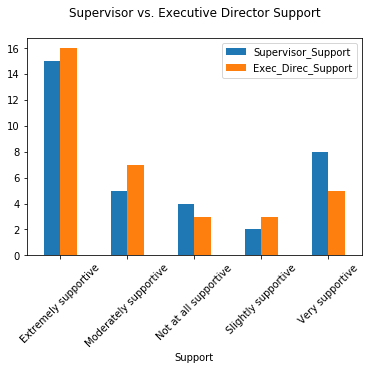

In [148]:
# Compare the support in each team
# support = supp_count_df.iloc[1]

supp_count_df.plot(kind='bar', align='center', rot=45)
plt.xlabel('Support')
plt.title('Supervisor vs. Executive Director Support\n')
plt.show()

In [122]:
# Columns to use 
cols = ['Supervisor_Support','Exec_Direc_Support']

team_supp_df2 = pd.concat([team_supp_df.groupby(['Team',e])[e].count().unstack() for e in cols],axis=1).fillna(0).astype(int)    
team_supp_df2.columns=pd.MultiIndex.from_product([cols,['Very supportive','Slightly supportive', 'Not at all supportive','Moderately supportive','Extremely supportive']])

team_supp_df2



Supervisor_Support                      \
                                   Very supportive Slightly supportive   
Team                                                                     
Academic Policy & Systems                        0                   0   
Arts                                             1                   0   
Assessment                                       1                   0   
Career & Technical Education                     1                   0   
Central                                          0                   0   
College & Career Planning                        2                   0   
Computer Science                                 0                   0   
Learning Strategy, and Systems                   1                   0   
Mastery Collaborative                            1                   0   
Operations                                       1                   0   
Periodic Assessment                              1                   1   
Principal Pipeline Strategy                      0                   1   
Research & Policy Support Group                  0                   0   
School Performance                               1                   1   
School Quality                                   2                   0   

                                                                             \
                                Not at all supportive Moderately supportive   
Team                                                                          
Academic Policy & Systems                           2                     1   
Arts                                                0                     0   
Assessment                                          1                     0   
Career & Technical Education                        0                     0   
Central                                             0                     0   
College & Career Planning                           0                     0   
Computer Science                                    0                     0   
Learning Strategy, and Systems                      0                     0   
Mastery Collaborative                               0                     0   
Operations                                          0                     0   
Periodic Assessment                                 0                     0   
Principal Pipeline Strategy                         0                     0   
Research & Policy Support Group                     1                     0   
School Performance                                  0                     0   
School Quality                                      0                     0   

                                                     Exec_Direc_Support  \
                                Extremely supportive    Very supportive   
Team                                                                      
Academic Policy & Systems                          1                  0   
Arts                                               1                  1   
Assessment                                         1                  2   
Career & Technical Education                       0                  1   
Central                                            1                  0   
College & Career Planning                          0                  2   
Computer Science                                   1                  0   
Learning Strategy, and Systems                     0                  1   
Mastery Collaborative                              0                  1   
Operations                                         0                  1   
Periodic Assessment                                0                  0   
Principal Pipeline Strategy                        0                  0   
Research & Policy Support Group                    1                  1   
School Performance                                 1                  0   
S

In [123]:
# Use chi-square test to determine the relationship between employee support from superevisors and directors based on their team

from scipy.stats import chisquare

chisquare(f_obs= team_supp_df2)

Power_divergenceResult(statistic=array([  8.        ,  12.        ,  18.5       ,  14.        ,
         8.        ,   9.45454545,  14.        ,  42.        ,
        13.        ,  10.        ]), pvalue=array([  8.89326022e-01,   6.06302782e-01,   1.84947574e-01,
         4.49711056e-01,   8.89326022e-01,   8.00877532e-01,
         4.49711056e-01,   1.23628463e-04,   5.26523623e-01,
         7.62183463e-01]))

Not receiving any support from the Executive Director is statistically significant to the team the employees are in. 

2) Are the values that DT&L places being met?

Four Values:
- Collaboration                                  
- Equity                                         
- Coherence                                      
- Continuous Improvement

In [124]:
# Create new DataFrame with columns, 'Collaboration','Equity','Coherence','Cont_Improvement'
values = df[['Collaboration','Equity','Coherence','Cont_Improvement']]

print("This is filtering 'Collaboration','Equity','Coherence','Cont_Improvement' from df:\n\n", values)

This is filtering 'Collaboration','Equity','Coherence','Cont_Improvement' from df:

          Collaboration              Equity           Coherence  \
0    Extremely present  Moderately present   Extremely present   
1         Very present        Very present        Very present   
2         Very present  Moderately present  Moderately present   
3     Slightly present    Slightly present  Moderately present   
4   Not at all present  Moderately present    Slightly present   
5   Not at all present  Moderately present    Slightly present   
6     Slightly present  Moderately present    Slightly present   
7     Slightly present  Moderately present    Slightly present   
8    Extremely present        Very present   Extremely present   
9    Extremely present        Very present  Moderately present   
10                 NaN                 NaN                 NaN   
11                 NaN                 NaN                 NaN   
12        Very present        Very present   Extremely pr

In [125]:
# Drop missing values from values dataframe
values.dropna()

,Collaboration,Equity,Coherence,Cont_Improvement
0,Extremely present,Moderately present,Extremely present,Very present
1,Very present,Very present,Very present,Moderately present
2,Very present,Moderately present,Moderately present,Very present
3,Slightly present,Slightly present,Moderately present,Not at all present
4,Not at all present,Moderately present,Slightly present,Not at all present
5,Not at all present,Moderately present,Slightly present,Not at all present
6,Slightly present,Moderately present,Slightly present,Moderately present
7,Slightly present,Moderately present,Slightly present,Moderately present
8,Extremely present,Very present,Extremely present,Extremely present
9,Extremely present,Very present,Moderately present,Extremely present


Let's measure the effectiveness of the values set in the company.

In [128]:
cols_values = ['Collaboration','Equity','Coherence','Cont_Improvement']

# Create list comprehension to count effectiveness for all values 
values_list = [ values.groupby(col).size() for col in cols_values ]

# Concatenate list into a dataframe
values_df = pd.concat(values_list, axis=1, keys=cols_values)

# Remove index name
values_df.index.name = None

values_df['Equity'].fillna(0, inplace=True)

values_df.head()

,Collaboration,Equity,Coherence,Cont_Improvement
Extremely present,4,0.0,3,2
Moderately present,4,17.0,12,8
Not at all present,2,0.0,3,3
Slightly present,9,3.0,6,3
Very present,11,10.0,6,14


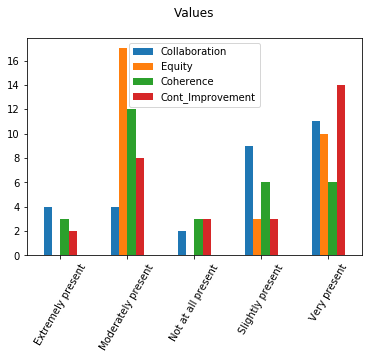

In [130]:
# Graph the values levels
values_df.plot(kind='bar', align='center', rot=60)
plt.title('Values\n')
plt.show()

90% of the employees surveyed said that the value, Equity, was either very or moderately present. Collaboration and coherence were the top two values that employees felt were slightly present. 